# Export for Live MNGMT

In [51]:
import json
import pandas as pd
from datetime import datetime

with open('/home/mardeen/Desktop/netvox-r718x-bin-sensor.json') as f:
    data = json.load(f)

import pandas as pd
from datetime import datetime

#df = pd.DataFrame(data['results'])
df = pd.DataFrame(data)

In [52]:
# import requests
# limit=100
# API_URL = f"https://data.melbourne.vic.gov.au//api/explore/v2.1/catalog/datasets/netvox-r718x-bin-sensor/records?order_by=time%20DESC&limit={limit}"
# response = requests.get(API_URL)
# response.json()
# data = response.json()


# #df = pd.DataFrame(data['results'])

In [59]:
def apply_longlag_trasformations(df):
    df['latitude'] = df['lat_long'].apply(lambda x: x['lat'] if x is not None else None)
    df['longitude'] = df['lat_long'].apply(lambda x: x['lon'] if x is not None else None)

    df.drop(columns=['lat_long'], inplace=True)
    return df

def apply_datetime_trasformations(df):
    df['datetime'] = pd.to_datetime(df['time'], errors='coerce')#.dt.floor('s')
    
    df = df.dropna(subset=['datetime'])

    df['date'] = df['datetime'].dt.floor('s')
    df['time_only'] = df['datetime'].dt.time
    #df['datetime'] = df['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')
    return df

In [64]:
import pandas as pd

def apply_longlag_transformations(df):
    df['latitude'] = df['lat_long'].apply(lambda x: x['lat'] if x is not None else None)
    df['longitude'] = df['lat_long'].apply(lambda x: x['lon'] if x is not None else None)
    df.drop(columns=['lat_long'], inplace=True)
    return df

def apply_datetime_transformations(df):
    # Print data types of the dataframe columns
    print("Data types before conversion:")
    print(df.dtypes)
    
    # Print first few entries of 'time' column to inspect
    print("Sample of 'time' column before conversion:")
    print(df['time'].head())
    
    # Ensure 'time' column values are strings
    df['time'] = df['time'].astype(str)
    
    # Convert 'time' column to datetime
    df['datetime'] = pd.to_datetime(df['time'], errors='coerce', utc=True)
    
    # Debugging: Check for non-convertible values
    non_convertible = df[df['datetime'].isna() & df['time'].notna()]
    if not non_convertible.empty:
        print("Non-convertible 'time' values:")
        print(non_convertible['time'])
    
    # Drop rows where conversion to datetime failed
    df = df.dropna(subset=['datetime'])
    
    # Additional debugging: Check 'datetime' column
    print("Sample of 'datetime' column after conversion:")
    print(df['datetime'].head())
    
    # Convert timezone-aware datetime to UTC and then floor to the nearest second
    df['datetime'] = df['datetime'].dt.tz_convert(None).dt.floor('s')
    df['date'] = df['datetime'].dt.date
    df['time_only'] = df['datetime'].dt.time
    
    # Print data types after conversion
    print("Data types after conversion:")
    print(df.dtypes)
    
    return df

# Example usage
# df_bins = apply_longlag_transformations(df)
df_bins = df_bins.dropna(subset=['time'])
df_bins = apply_datetime_transformations(df_bins)

print(len(df_bins))


Data types before conversion:
dev_id          object
time            object
temperature    float64
distance       float64
filllevel      float64
battery        float64
sensor_name     object
fill_level     float64
latitude       float64
longitude      float64
datetime        object
dtype: object
Sample of 'time' column before conversion:
0    2023-02-27T03:02:37+11:00
1    2023-02-26T19:16:37+11:00
2    2023-02-26T19:21:16+11:00
3    2023-02-26T19:22:26+11:00
4    2023-02-26T19:28:41+11:00
Name: time, dtype: object
Sample of 'datetime' column after conversion:
0   2023-02-26 16:02:37+00:00
1   2023-02-26 08:16:37+00:00
2   2023-02-26 08:21:16+00:00
3   2023-02-26 08:22:26+00:00
4   2023-02-26 08:28:41+00:00
Name: datetime, dtype: datetime64[ns, UTC]
Data types after conversion:
dev_id                 object
time                   object
temperature           float64
distance              float64
filllevel             float64
battery               float64
sensor_name            object
f

In [65]:
df_bins

,dev_id,time,temperature,distance,filllevel,battery,sensor_name,fill_level,latitude,longitude,datetime,date,time_only
0,r718x-6f25,2023-02-27T03:02:37+11:00,16.9,223.0,71.0,3.6,r718x-bin sensor 18,69.0,-37.802243,144.965710,2023-02-26 16:02:37,2023-02-26,16:02:37
1,r718x-6771,2023-02-26T19:16:37+11:00,19.1,284.0,63.0,3.6,r718x-bin sensor 4,61.0,-37.803208,144.965262,2023-02-26 08:16:37,2023-02-26,08:16:37
2,r718x-6f34,2023-02-26T19:21:16+11:00,20.7,380.0,51.0,3.6,r718x-bin sensor 20,47.0,-37.802165,144.966142,2023-02-26 08:21:16,2023-02-26,08:21:16
3,r718x-6f33,2023-02-26T19:22:26+11:00,22.8,200.0,90.0,3.6,None,72.0,NaN,NaN,2023-02-26 08:22:26,2023-02-26,08:22:26
4,r718x-6f31,2023-02-26T19:28:41+11:00,19.6,204.0,74.0,3.6,r718x-bin sensor 19,72.0,-37.802259,144.965949,2023-02-26 08:28:41,2023-02-26,08:28:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
621471,r718x-677c,2024-06-04T07:14:16+10:00,10.0,318.0,59.0,3.6,r718x-bin sensor 10,56.0,-37.803282,144.966126,2024-06-03 21:14:16,2024-06-03,21:14:16
621472,r718x-677a,2024-06-04T07:21:36+10:00,19.5,201.0,89.0,3.6,r718x-bin sensor 9,72.0,-37.802867,144.965795,2024-06-03 21:21:36,2024-06-03,21:21:36
621473,r718x-6f33,2024-06-04T04:01:16+10:00,8.9,199.0,90.0,3.6,None,72.0,NaN,NaN,2024-06-03 18:01:16,2024-06-03,18:01:16
621474,r718x-6f10,2024-06-04T07:13:39+10:00,19.1,201.0,89.0,3.6,None,72.0,NaN,NaN,2024-06-03 21:13:39,2024-06-03,21:13:39


In [66]:
# #df_bins = apply_longlag_trasformations(df)
# df_bins = df_bins.dropna(subset=['time'])
# df_bins = apply_datetime_trasformations(df_bins)

# len(df_bins)

In [67]:
df_bins

,dev_id,time,temperature,distance,filllevel,battery,sensor_name,fill_level,latitude,longitude,datetime,date,time_only
0,r718x-6f25,2023-02-27T03:02:37+11:00,16.9,223.0,71.0,3.6,r718x-bin sensor 18,69.0,-37.802243,144.965710,2023-02-26 16:02:37,2023-02-26,16:02:37
1,r718x-6771,2023-02-26T19:16:37+11:00,19.1,284.0,63.0,3.6,r718x-bin sensor 4,61.0,-37.803208,144.965262,2023-02-26 08:16:37,2023-02-26,08:16:37
2,r718x-6f34,2023-02-26T19:21:16+11:00,20.7,380.0,51.0,3.6,r718x-bin sensor 20,47.0,-37.802165,144.966142,2023-02-26 08:21:16,2023-02-26,08:21:16
3,r718x-6f33,2023-02-26T19:22:26+11:00,22.8,200.0,90.0,3.6,None,72.0,NaN,NaN,2023-02-26 08:22:26,2023-02-26,08:22:26
4,r718x-6f31,2023-02-26T19:28:41+11:00,19.6,204.0,74.0,3.6,r718x-bin sensor 19,72.0,-37.802259,144.965949,2023-02-26 08:28:41,2023-02-26,08:28:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
621471,r718x-677c,2024-06-04T07:14:16+10:00,10.0,318.0,59.0,3.6,r718x-bin sensor 10,56.0,-37.803282,144.966126,2024-06-03 21:14:16,2024-06-03,21:14:16
621472,r718x-677a,2024-06-04T07:21:36+10:00,19.5,201.0,89.0,3.6,r718x-bin sensor 9,72.0,-37.802867,144.965795,2024-06-03 21:21:36,2024-06-03,21:21:36
621473,r718x-6f33,2024-06-04T04:01:16+10:00,8.9,199.0,90.0,3.6,None,72.0,NaN,NaN,2024-06-03 18:01:16,2024-06-03,18:01:16
621474,r718x-6f10,2024-06-04T07:13:39+10:00,19.1,201.0,89.0,3.6,None,72.0,NaN,NaN,2024-06-03 21:13:39,2024-06-03,21:13:39


In [78]:
df_bins

,dev_id,time,temperature,distance,filllevel,battery,sensor_name,fill_level,latitude,longitude,datetime,date,time_only,month,year
0,r718x-6f25,2023-02-27T03:02:37+11:00,16.9,223.0,71.0,3.6,r718x-bin sensor 18,69.0,-37.802243,144.965710,2023-02-26 16:02:37,2023-02-26,16:02:37,February,2023
1,r718x-6771,2023-02-26T19:16:37+11:00,19.1,284.0,63.0,3.6,r718x-bin sensor 4,61.0,-37.803208,144.965262,2023-02-26 08:16:37,2023-02-26,08:16:37,February,2023
2,r718x-6f34,2023-02-26T19:21:16+11:00,20.7,380.0,51.0,3.6,r718x-bin sensor 20,47.0,-37.802165,144.966142,2023-02-26 08:21:16,2023-02-26,08:21:16,February,2023
3,r718x-6f33,2023-02-26T19:22:26+11:00,22.8,200.0,90.0,3.6,None,72.0,NaN,NaN,2023-02-26 08:22:26,2023-02-26,08:22:26,February,2023
4,r718x-6f31,2023-02-26T19:28:41+11:00,19.6,204.0,74.0,3.6,r718x-bin sensor 19,72.0,-37.802259,144.965949,2023-02-26 08:28:41,2023-02-26,08:28:41,February,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621471,r718x-677c,2024-06-04T07:14:16+10:00,10.0,318.0,59.0,3.6,r718x-bin sensor 10,56.0,-37.803282,144.966126,2024-06-03 21:14:16,2024-06-03,21:14:16,June,2024
621472,r718x-677a,2024-06-04T07:21:36+10:00,19.5,201.0,89.0,3.6,r718x-bin sensor 9,72.0,-37.802867,144.965795,2024-06-03 21:21:36,2024-06-03,21:21:36,June,2024
621473,r718x-6f33,2024-06-04T04:01:16+10:00,8.9,199.0,90.0,3.6,None,72.0,NaN,NaN,2024-06-03 18:01:16,2024-06-03,18:01:16,June,2024
621474,r718x-6f10,2024-06-04T07:13:39+10:00,19.1,201.0,89.0,3.6,None,72.0,NaN,NaN,2024-06-03 21:13:39,2024-06-03,21:13:39,June,2024


In [85]:
# Red plot with average fill level per month in current year
df_bins['year'] = pd.to_datetime(df_bins['datetime']).dt.strftime('%Y')
year2024 = df_bins.loc[df_bins['year'] == '2024']

year2024['month'] = pd.to_datetime(year2024['datetime']).dt.strftime('%B')

temperature = year2024.groupby('month')['temperature'].mean().sort_values(ascending=False).reset_index()

import json
temperature_str = temperature.astype(str)
temp_dict = temperature_str.to_dict(orient='records')
temp_json = json.dumps(temp_dict)

with open('/home/mardeen/Desktop/black-dashboard-angular-master/src/assets/data/temperature.json', "wb") as f:
    f.write(temp_json.encode())

/tmp/ipykernel_58535/862253873.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year2024['month'] = pd.to_datetime(year2024['datetime']).dt.strftime('%B')


In [70]:
# bins data
import json
bins_str = df_bins.astype(str)
bins_dict = bins_str.to_dict(orient='records')
bins_json = json.dumps(bins_dict)

with open('/home/mardeen/Desktop/black-dashboard-angular-master/src/assets/data/data.json', "wb") as f:
    f.write(bins_json.encode())

In [5]:
# live bins data
live_turno_corrente = df_bins.groupby('dev_id').agg({
    'filllevel': 'last',
    'temperature': 'last',
    'datetime': 'last',
    'battery':'last'}).reset_index()
def create_dict_from_dataframe(df, column_name):
    """Create a Dict frm a dataframe grouped by Macchina column name"""
    result_dict = dict()
    for val in df[column_name].unique():
        filtered_df = df[df[column_name] == val]
        result_dict[str(val)] = filtered_df.to_dict('records')
    return result_dict
live_turno_corrente = live_turno_corrente.astype(str)
live_turno_corrente_dict = create_dict_from_dataframe(live_turno_corrente, 'dev_id')
total_json = {}
import json
total_json = live_turno_corrente_dict
total_json = json.dumps(total_json)

with open('/home/mardeen/Desktop/black-dashboard-angular-master/src/assets/data/live.json', "wb") as f:
    f.write(total_json.encode())


#####################################################À

In [6]:
import requests
limit=100

API_URL2 = f"https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/meshed-sensor-type-1/records?order_by=time%20DESC&limit={limit}"
response2 = requests.get(API_URL2)
data2 = response2.json()


df2 = pd.DataFrame(data2['results'])

df_weather = apply_longlag_trasformations(df2)
df_weather = apply_datetime_trasformations(df_weather)

df_weather.head()
len(df_weather)


100

###############################################################################

In [81]:
print(df_weather.columns)
print(df_bins.columns)

Index(['dev_id', 'time', 'rtc', 'battery', 'solarpanel', 'command', 'solar',
       'precipitation', 'strikes', 'windspeed', 'winddirection', 'gustspeed',
       'vapourpressure', 'atmosphericpressure', 'relativehumidity', 'airtemp',
       'sensor_name', 'latitude', 'longitude', 'datetime', 'date',
       'time_only'],
      dtype='object')
Index(['dev_id', 'time', 'temperature', 'distance', 'filllevel', 'battery',
       'sensor_name', 'fill_level', 'latitude', 'longitude', 'datetime',
       'date', 'time_only'],
      dtype='object')


In [95]:
import pandas as pd

bins = df_bins[['filllevel','temperature','datetime', 'battery','date','time_only','latitude', 'longitude']]
wth = df_weather[['solarpanel', 'command', 'solar',
       'precipitation', 'strikes', 'windspeed', 'winddirection', 'gustspeed',
       'vapourpressure', 'atmosphericpressure', 'relativehumidity', 'airtemp',
       'sensor_name', 'datetime']]
bins.rename(columns={'temperature':'bin_temperature'}, inplace=True)
# Convert 'datetime' columns to datetime format if they are not already
bins['datetime'] = pd.to_datetime(bins['datetime'])
wth['datetime'] = pd.to_datetime(wth['datetime'])

# Set 'datetime' as the index for resampling
wth.set_index('datetime', inplace=True)

# Resample the weather data to match the bin data frequency (every second) and forward fill missing values
df_weather_resampled = wth.resample('s').ffill().reset_index()

# Merge the dataframes on 'datetime'
merged_df = pd.merge(bins, df_weather_resampled, on='datetime', how='left')

# Display the merged dataframe
#print(merged_df.head())


/tmp/ipykernel_212605/1294704586.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bins.rename(columns={'temperature':'bin_temperature'}, inplace=True)
/tmp/ipykernel_212605/1294704586.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bins['datetime'] = pd.to_datetime(bins['datetime'])
/tmp/ipykernel_212605/1294704586.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [98]:
merged_df

,filllevel,bin_temperature,datetime,battery,date,time_only,latitude,longitude,solarpanel,command,...,precipitation,strikes,windspeed,winddirection,gustspeed,vapourpressure,atmosphericpressure,relativehumidity,airtemp,sensor_name
0,53,10.1,2024-05-25 15:05:15,3.6,2024-05-25,15:05:15,-37.803197,144.965273,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,74,10.4,2024-05-25 15:02:26,3.6,2024-05-25,15:02:26,-37.802879,144.966273,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,74,9.4,2024-05-25 15:00:55,3.6,2024-05-25,15:00:55,-37.802750,144.966473,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90,9.7,2024-05-25 15:00:40,3.6,2024-05-25,15:00:40,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,60,9.9,2024-05-25 14:59:04,3.6,2024-05-25,14:59:04,-37.803282,144.966126,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,56,12.1,2024-05-25 12:43:17,3.6,2024-05-25,12:43:17,-37.802165,144.966142,1.039,0.0,...,0.0,0.0,0.32,312.6,0.94,1.15,102.14,89.0,10.8,Weather Station
96,57,11.2,2024-05-25 12:41:47,3.6,2024-05-25,12:41:47,-37.802881,144.966261,1.023,0.0,...,0.0,0.0,0.37,216.2,0.77,1.15,102.14,87.0,11.1,Weather Station
97,90,11.3,2024-05-25 12:39:01,3.6,2024-05-25,12:39:01,-37.802243,144.965710,1.023,0.0,...,0.0,0.0,0.37,216.2,0.77,1.15,102.14,87.0,11.1,Weather Station
98,74,10.8,2024-05-25 12:36:23,3.6,2024-05-25,12:36:23,-37.802577,144.965656,1.023,0.0,...,0.0,0.0,0.37,216.2,0.77,1.15,102.14,87.0,11.1,Weather Station


In [97]:
merged_df.columns

Index(['filllevel', 'bin_temperature', 'datetime', 'battery', 'date',
       'time_only', 'latitude', 'longitude', 'solarpanel', 'command', 'solar',
       'precipitation', 'strikes', 'windspeed', 'winddirection', 'gustspeed',
       'vapourpressure', 'atmosphericpressure', 'relativehumidity', 'airtemp',
       'sensor_name'],
      dtype='object')

In [100]:
mdf = merged_df[['filllevel', 'bin_temperature', 'datetime', 'battery', 'date',
       'time_only', 'latitude', 'longitude', 'solarpanel', 'solar',
       'precipitation', 'strikes', 'windspeed',
       'vapourpressure', 'atmosphericpressure', 'relativehumidity', 'airtemp']]

In [111]:
mdf[mdf.isna().any(axis=1)]

mdf_all_notna = mdf[mdf.notna().all(axis=1)]

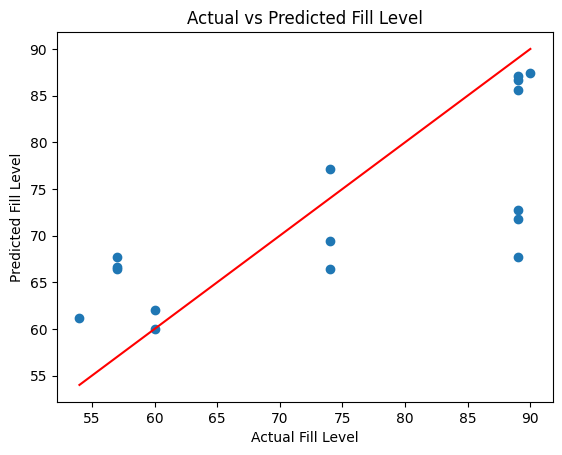

In [133]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

x = mdf_all_notna[['bin_temperature', 'battery',
       'latitude', 'longitude', 'solarpanel', 'solar',
       'precipitation', 'strikes', 'windspeed', 'vapourpressure',
       'atmosphericpressure', 'relativehumidity', 'airtemp']]
y = mdf_all_notna['filllevel']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
regressor = LinearRegression()

# Fit the model to the data
regressor.fit(x_train, y_train)

# Predict the output
y_pred = regressor.predict(x_test)

# Evaluate the model
mse = np.mean((y_pred - y_test) ** 2)
mae = np.mean(np.abs(y_pred - y_test))

# Visualize the results
# Visualize the results - Predicted vs. Actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Fill Level")
plt.ylabel("Predicted Fill Level")
plt.title("Actual vs Predicted Fill Level")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of best fit
plt.show()


In [134]:
#xxx = regressor.fit(x_train, y_train)
coefficients = pd.DataFrame({'Feature': x.columns, 'Coefficient': regressor.coef_})


In [135]:
print(coefficients)

                Feature   Coefficient
0       bin_temperature  2.302735e+00
1               battery -1.104268e-10
2              latitude  1.251648e+04
3             longitude  2.259818e+03
4            solarpanel  7.806575e+00
5                 solar -4.547474e-13
6         precipitation  0.000000e+00
7               strikes  0.000000e+00
8             windspeed  1.098784e+01
9        vapourpressure -6.215927e+02
10  atmosphericpressure -3.608111e+02
11     relativehumidity  5.887128e+00
12              airtemp  4.383035e+01
